In [15]:
import pandas as pd

In [16]:
# 读取数据
data = pd.read_csv('JD_comments_data.csv', encoding='utf-8')
# 去重
data = data.drop_duplicates(subset=['Username', 'Comment'])
# 删除缺省值数据
data = data.dropna()
# 去除多余空格
data['Username'] = data['Username'].str.strip()
data['Comment'] = data['Comment'].str.strip()
data['Color'] = data['Color'].str.strip()
data['Model'] = data['Model'].str.strip()
data['Time'] = data['Time'].str.strip()
data['Address'] = data['Address'].str.strip()
data['Star'] = data['Star'].astype(str)
data['Star'] = data['Star'].str.strip()
# 将日期转换为标准日期格式
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
# 检查并处理异常值（例如，星级应该在1到5之间）
data = data[(data['Star'].astype(int) >= 1) & (data['Star'].astype(int) <= 5)]


In [17]:
data

,Username,Comment,Color,Model,Time,Address,Star
0,Z***啵,性价比很高的手机，14比14pro更值得购买，续航时间长了很多，价格也还不错，拍照也是足够用...,白色,16GB+512GB,2024-06-10,浙江,5
1,j***5,小米14，真乃科技美学之典范！屏幕清晰亮丽，性能强劲无比，运行速度飞快。拍照效果更是惊艳，细...,白色,16GB+512GB,2024-06-09,四川,5
2,j***1,快递很快就送来了，包装很精美，小米十四，很轻薄，发热量不是很大，屏幕显示很好，比我之前的米1...,黑色,16GB+1TB,2024-05-27,广东,5
3,j***g,这款手机获得了一致好评。特点包括新颖的款式、高清拍照效果、畅玩的电池续航、清晰的通信音质、流...,岩石青,16GB+512GB,2024-06-11,湖北,5
4,g***贝,小米14的徕卡超清人像真的太好看了，拍出来真的特别漂亮，随手一拍就很好看，还送了一个很精美的...,黑色,16GB+1TB,2024-05-31,浙江,5
...,...,...,...,...,...,...,...
995,a***o,京东买手机就是快，一天下单收货换机回收全搞定了。小米14比原来用的10窄些，适合单手操作很喜...,雪山粉,12GB+256GB,2024-04-11,天津,5
996,C***n,外形外观：外观上黑白色最好看，白色永远好看年轻\n屏幕音效：屏幕通透，音质还好吧。听起来没啥...,白色,12GB+256GB,2024-05-09,陕西,5
997,风***露,外形外观：小屏，轻巧便携，一手就能操作，很简单方便\n屏幕音效：屏幕看着很舒服\n拍照效果：...,雪山粉,16GB+1TB,2024-05-15,四川,5
998,本***人,·一：小米14和小米14Pro一样均搭载了骁龙\n8Gen3处理器，这款芯片日常使用方面并不...,白色,16GB+512GB,2024-04-24,广东,5


In [18]:
# 特征工程：提取评论长度
data['Comment_Length'] = data['Comment'].apply(len)
# 特征工程：提取日期信息
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 数据标准化
# 标准化
scaler = StandardScaler()
data[['Comment_Length', 'Year', 'Month', 'Day']] = scaler.fit_transform(data[['Comment_Length', 'Year', 'Month', 'Day']])
# 归一化
min_max_scaler = MinMaxScaler()
data[['Comment_Length', 'Year', 'Month', 'Day']] = min_max_scaler.fit_transform(data[['Comment_Length', 'Year', 'Month', 'Day']])


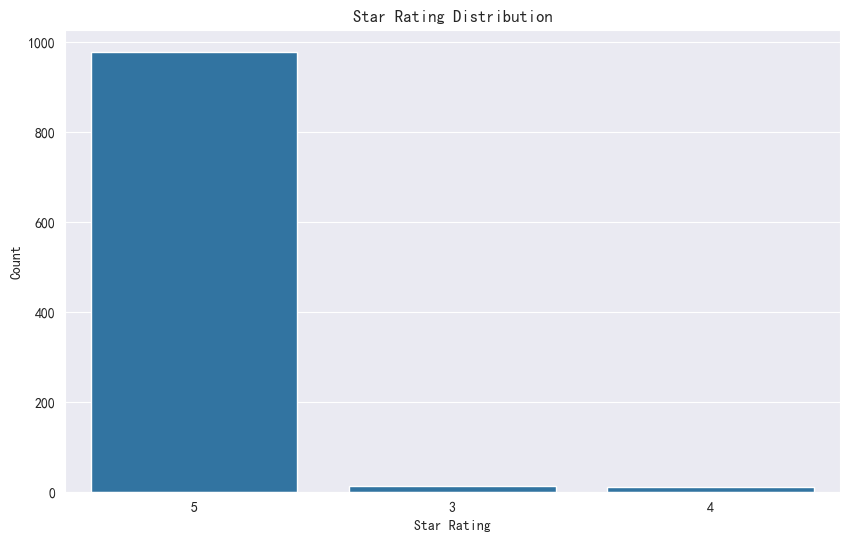

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei'
#1.星级分布分析：使用 countplot 显示星级分布
# 星级分布
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Star')
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

count    1000.000000
mean        0.180484
std         0.132508
min         0.000000
25%         0.106719
50%         0.141304
75%         0.203557
max         1.000000
Name: Comment_Length, dtype: float64


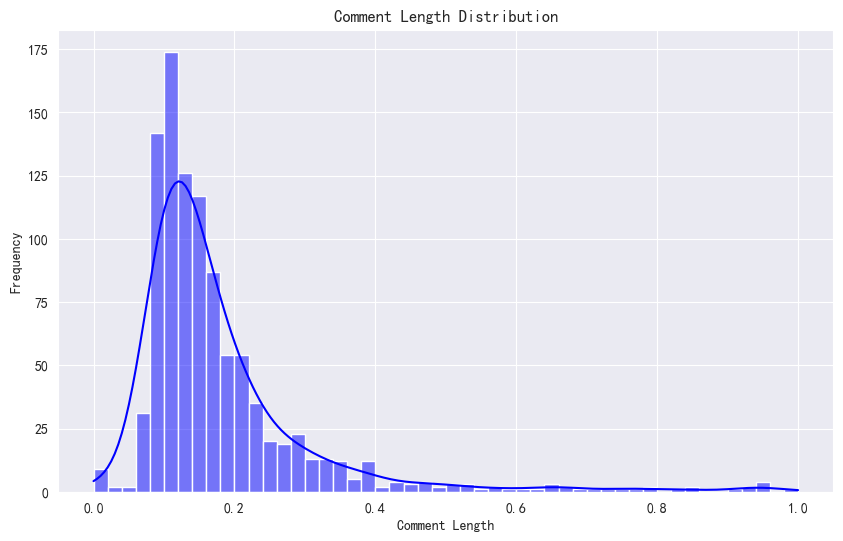

In [20]:
#2.评论长度分布分析：使用 histplot 显示评论长度的分布，并计算基本统计信息。
# 评论长度的基本统计信息
print(data['Comment_Length'].describe())

# 可视化评论长度分布
plt.figure(figsize=(10, 6))
sns.histplot(data['Comment_Length'], bins=50, kde=True, color='blue')
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

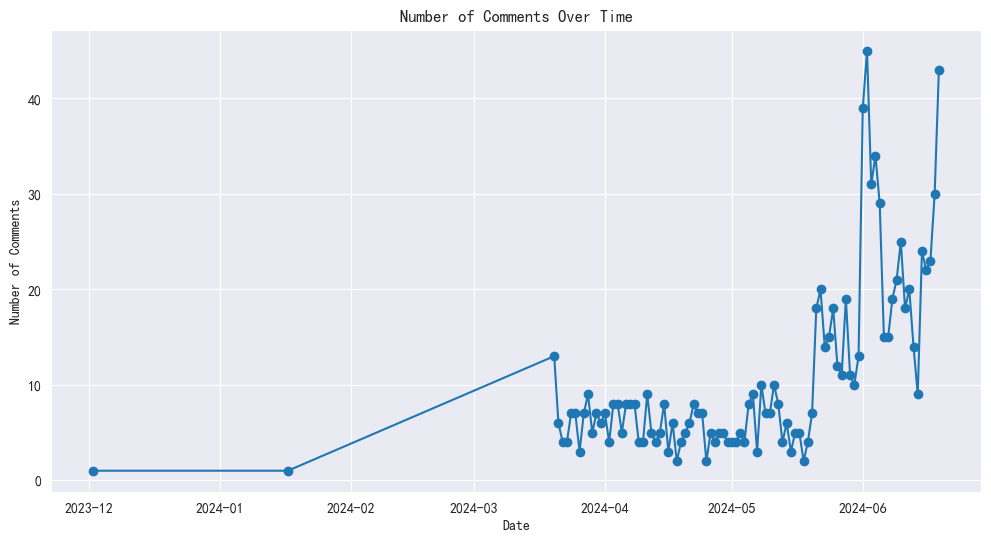

In [21]:
#3.按时间分析评论数量：使用 lineplot 显示按日期的评论数量变化。
# 按日期统计评论数量
data['Date'] = data['Time'].dt.date
date_counts = data['Date'].value_counts().sort_index()

# 可视化按日期的评论数量
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

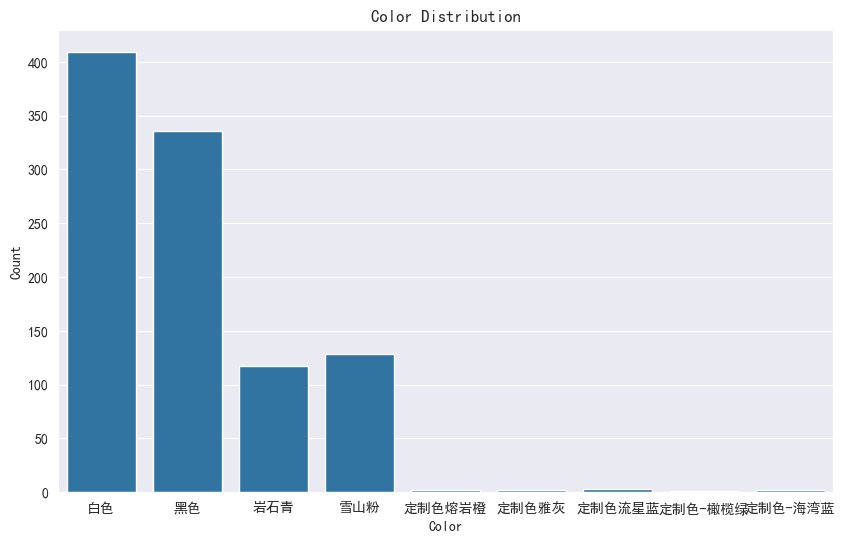

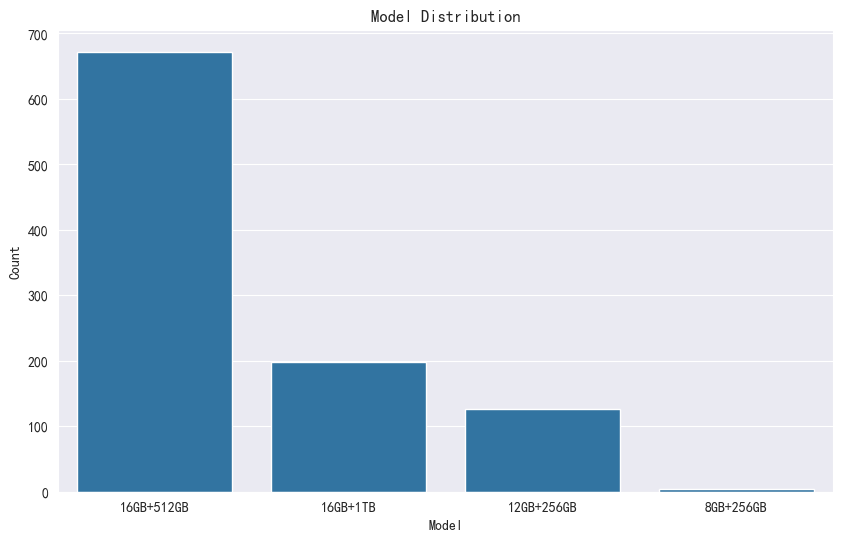

In [22]:
#4.颜色和型号分布分析：使用 countplot 显示颜色和型号的分布。
# 颜色分布
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Color')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# 型号分布
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Model')
plt.title('Model Distribution')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

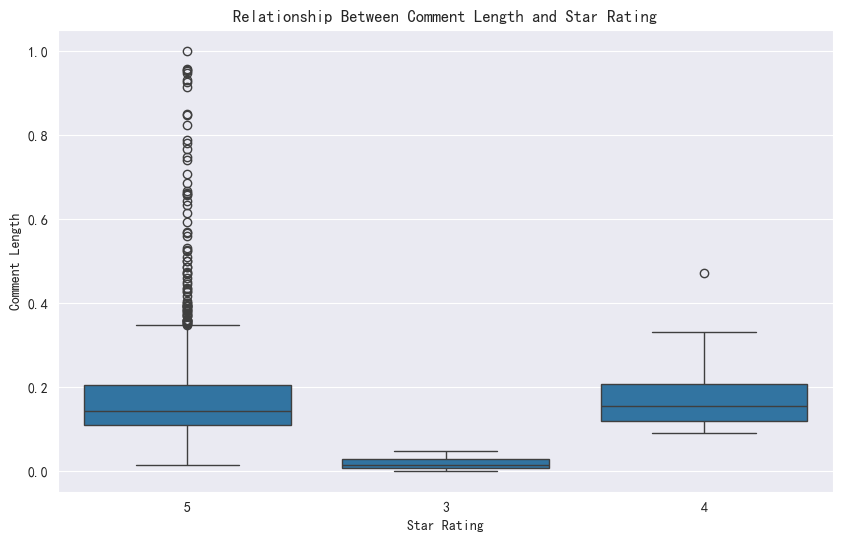

In [23]:
#5.评论长度与星级的关系：使用 boxplot 显示评论长度与星级的关系。
# 评论长度与星级的关系
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Star', y='Comment_Length')
plt.title('Relationship Between Comment Length and Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Comment Length')
plt.show()

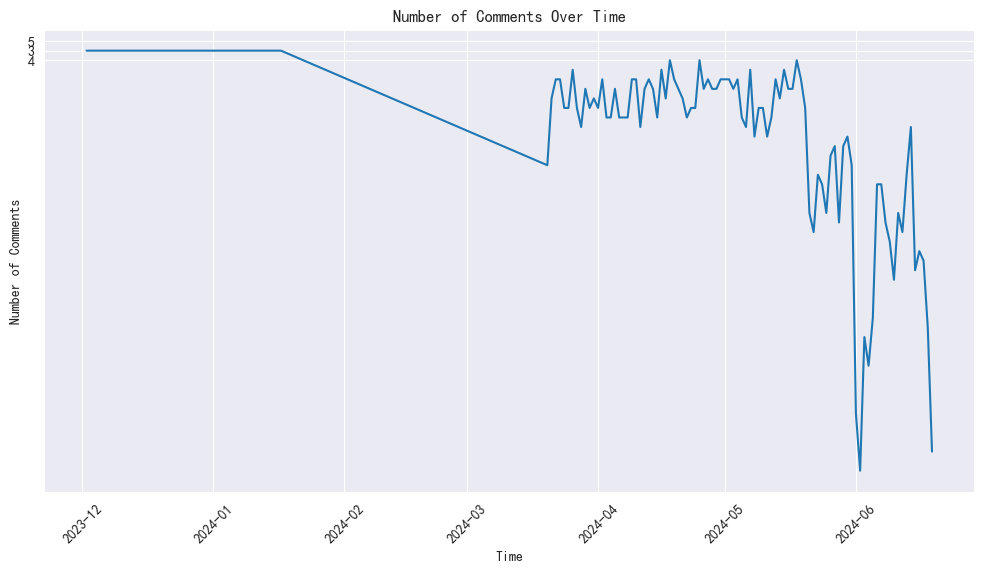

In [24]:
#6.评论数量与时间的关系：使用 lineplot 显示评论数量随时间的变化趋势。
# 评论数量与时间的关系
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Time', y='Star', estimator='count', errorbar=None)
plt.title('Number of Comments Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

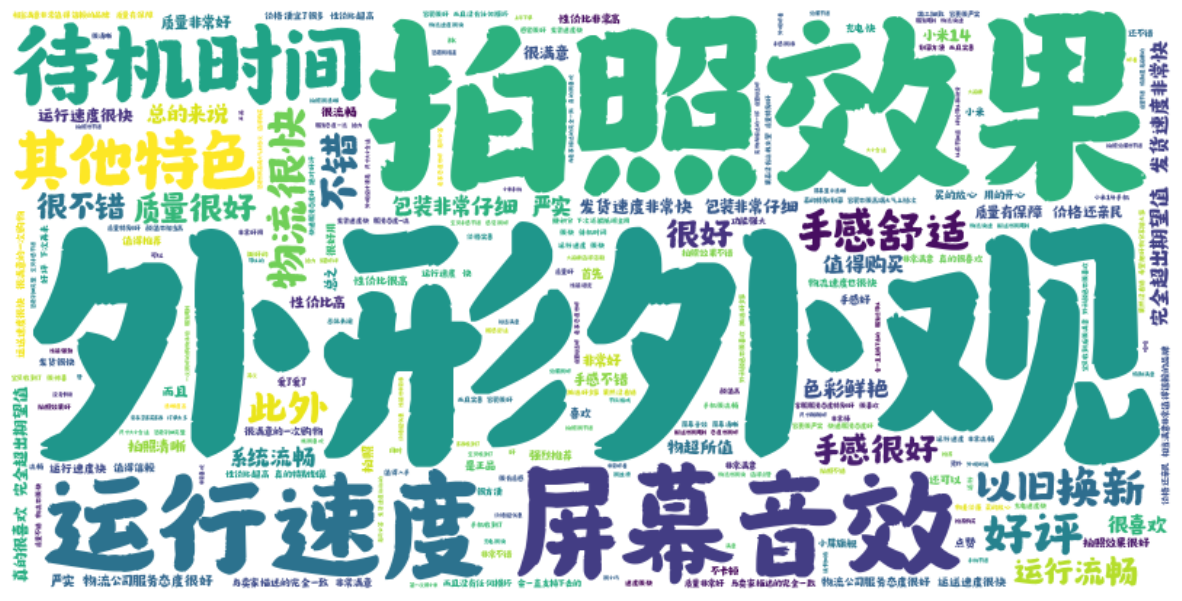

In [25]:
#7.评论中关键词的词云：生成并显示评论内容的词云。
from wordcloud import WordCloud
# 生成词云
text = ' '.join(data['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path='XiangJiaoDaJiangJunLingGanTi-2.ttf').generate(text)
# 显示词云
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# 特征提取:使用 TfidfVectorizer 将评论文本转换为特征向量。
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 将星级转换为情感标签（1-3星为负面，4-5星为正面）
data['Sentiment'] = data['Star'].apply(lambda x: 1 if int(x) > 3 else 0)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Sentiment'], test_size=0.2, random_state=42)

# 使用TF-IDF向量化评论文本
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
# 模型构建:使用逻辑回归模型进行情感分类。

from sklearn.linear_model import LogisticRegression

# 构建逻辑回归模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 预测测试集
y_pred = model.predict(X_test_tfidf)

In [28]:
# 模型评估评估模型的性能，包括准确率、精确率、召回率和F1分数。

from sklearn.metrics import classification_report, accuracy_score

# 打印分类报告
print(classification_report(y_test, y_pred,zero_division=0))

# 打印准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200

Accuracy: 0.9850


In [29]:
# 特征重要性分析、错误分析。
import numpy as np

# 获取特征名称
feature_names = vectorizer.get_feature_names_out()

# 获取特征权重
coefficients = model.coef_.flatten()

# 创建特征权重的DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 按绝对值排序特征权重
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].apply(np.abs)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# 打印前20个重要特征
print(feature_importance.head(20))

              Feature  Coefficient  Abs_Coefficient
330           一般般勉强能用    -0.972068         0.972068
3449  第一次买小米手机不知道好不好用    -0.972068         0.972068
4779             非常不错    -0.821634         0.821634
1769          手机颜色很好看    -0.774264         0.774264
2387        暂时没发现什么问题    -0.751553         0.751553
532        从小米4用到小米14    -0.687356         0.687356
2410         最后一部小米手机    -0.687356         0.687356
268         一家非常喜欢的店铺    -0.682021         0.682021
4073            质量很好哦    -0.682021         0.682021
3487        等用段时间再来评价    -0.607550         0.607550
4369               还行    -0.598144         0.598144
702   但是京东上买他不送耳机和笔记本    -0.585701         0.585701
1727           手机没啥问题    -0.585701         0.585701
3621            给孩子买的    -0.567808         0.567808
2910             物流很快    -0.529051         0.529051
2021              挺好的    -0.499498         0.499498
4368            还能用就行    -0.496068         0.496068
1905           拍照效果很好    -0.481919         0.481919
1487        